In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# 目标函数
def objective_function(x):
    return 10 * np.sin(5*x) + 7 * np.abs(x-5) + 10

# 参数
npop = 100  # 种群数量
ngen = 100  # 进化代数
mutation_rate = 0.1  # 变异概率
crossover_rate = 0.8  # 交叉概率
lb, ub = 0, 10  # 变量x的范围

# 生成初始种群
population = np.random.uniform(lb, ub, npop)
fitness = objective_function(population)

best_fitness = []
best_individuals = []

In [24]:
# 进化过程
for gen in range(ngen):
    # 选择：轮盘赌选择法
    fitness_prob = fitness / np.sum(fitness)
    selected_parents = np.random.choice(population, size=npop, p=fitness_prob)
    
    # 交叉
    children = []
    for i in range(0, npop, 2):
        p1, p2 = selected_parents[i], selected_parents[i+1]
        if np.random.rand() < crossover_rate:
            child1 = p2
            child2 = p1
        else:
            child1, child2 = p1, p2
        children.extend([child1, child2])
    children = np.array(children)
    
    # 变异
    mutation_mask = np.random.rand(npop) < mutation_rate
    mutation_values = np.random.uniform(-1, 1, npop) * mutation_mask
    children = children + mutation_values
    children = np.clip(children, lb, ub)  # 确保子代在定义域内
    
    # 替换
    total_population = np.concatenate([population, children])
    total_fitness = objective_function(total_population)
    idx = np.argsort(total_fitness)[:npop]  # 选择适应度最好的个体
    population = total_population[idx]
    fitness = total_fitness[idx]
    
    # 记录每代的最佳适应度和个体
    best_fitness.append(fitness[0])
    best_individuals.append(population[0])

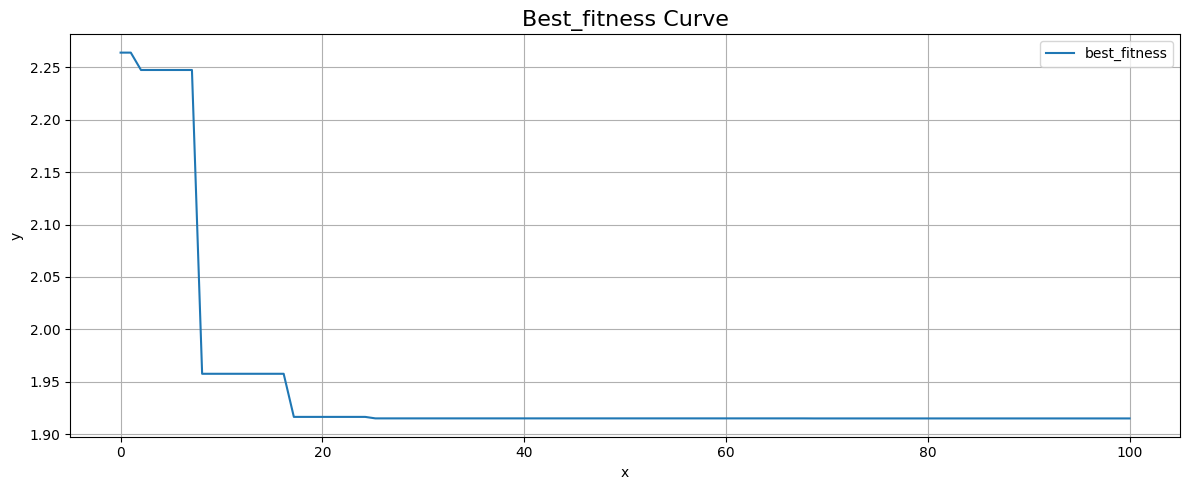

In [32]:
# 最佳适应度曲线
plt.figure(figsize=(12, 5))
x_index = np.linspace(0, 100, 100)

plt.title('Best_fitness Curve', fontsize=16)
plt.plot(x_index, best_fitness, label="best_fitness")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

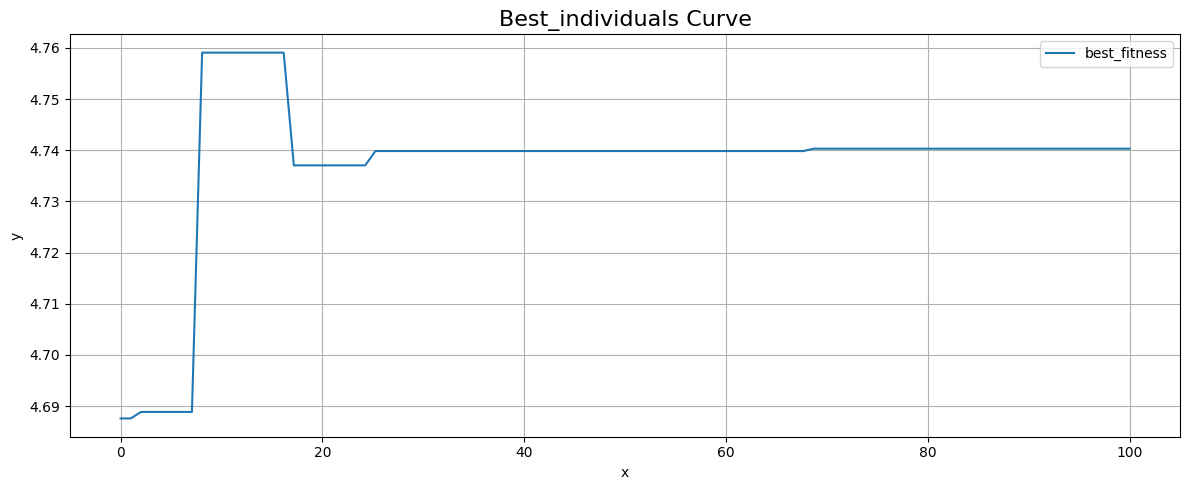

In [35]:
# 最佳个体曲线
plt.figure(figsize=(12, 5))
x_index = np.linspace(0, 100, 100)
plt.title('Best_individuals Curve', fontsize=16)
plt.plot(x_index, best_individuals, label="best_fitness")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
# 结果
best_fitness, best_x = best_fitness[-1], best_individuals[-1]

In [16]:
best_fitness, best_x

(1.9151576579498766, 4.741060612805114)

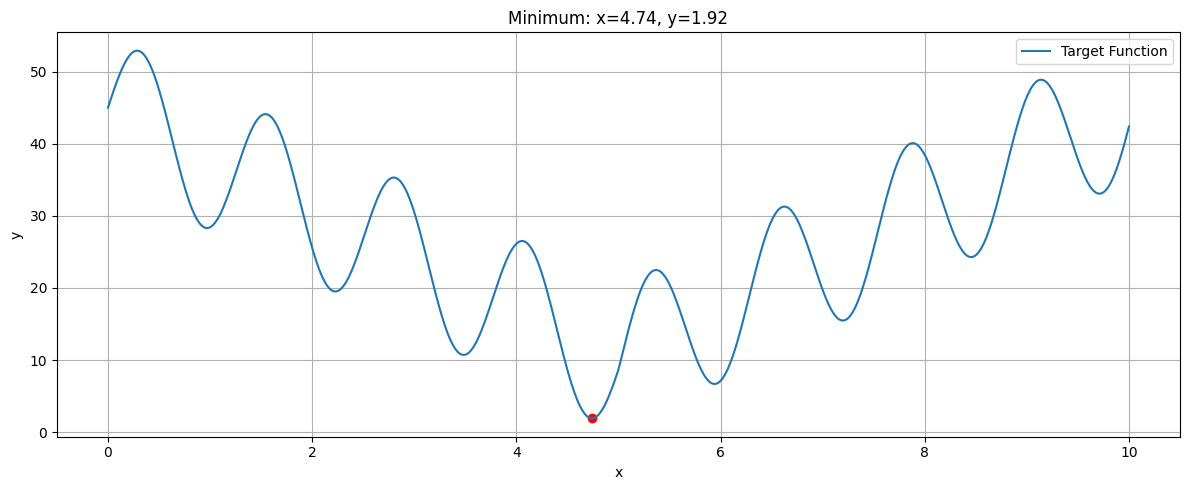

In [18]:
# 可视化
x = np.linspace(lb, ub, 1000)
y = objective_function(x)

plt.figure(figsize=(12, 5))

# 函数可视化
plt.plot(x, y, label="Target Function")
plt.scatter([best_x], [best_fitness], color="red")
plt.title(f"Minimum: x={best_x:.2f}, y={best_fitness:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()